In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17088, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 17088 (delta 22), reused 7 (delta 7), pack-reused 17057 (from 5)
Receiving objects: 100% (17088/17088), 15.70 MiB | 14.50 MiB/s, done.
Resolving deltas: 100% (11727/11727), done.
/kaggle/working/yolov5


In [4]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 31.6 MB/s eta 0:00:00


In [4]:
# hyp_file = "/kaggle/working/yolov5/data/hyps/hyp.scratch-low.yaml"
# with open(hyp_file, "r") as file:
#     hyp_data = file.read()

# # Chỉnh sửa augmentations
# hyp_data = hyp_data.replace("hsv_h: 0.015", "hsv_h: 0.03")
# hyp_data = hyp_data.replace("degrees: 0.0", "degrees: 10.0")
# hyp_data = hyp_data.replace("translate: 0.1", "translate: 0.2")

# with open(hyp_file, "w") as file:
#     file.write(hyp_data)
# print("Updated hyp.scratch-low.yaml")

Updated hyp.scratch-low.yaml


In [5]:
import os
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
# !python val.py --weights runs/train/exp/weights/best.pt --data dataset.yaml --task test

Một số biển số VN sử dụng khung, bu lông ốc vít to làm che/gây nhiễu ký tự/chữ số => khoanh vùng bounding box kỹ, khoanh sát ký tự nhất có thể.

In [6]:
!python train.py --img 640 --batch 16 --epochs 50 --data /kaggle/input/fileyaml-ver2/dataset.yaml --weights yolov5m.pt --cache
# !python train.py --weights yolov5s.pt --data /kaggle/input/d/anfeco/fileyaml/dataset.yaml --hyp /kaggle/working/yolov5/data/hyps/hyp.scratch-low.yaml --epochs 50

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-06 13:41:07.866489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-06 13:41:08.087137: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-06 13:41:08.149422: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

Sử dụng YOLOv5s.pt (một mô hình nhỏ và nhanh, phù hợp để khởi đầu)
Tổng số 661 ảnh trong tập huấn luyện và tập kiểm tra.
Hiệu suất mô hình:

Precision (P): Độ chính xác phát hiện đối tượng:
Toàn bộ (all): 97.9%
Biển số 1 dòng (BS1): 99.2%
Biển số 2 dòng (BS2): 96.6%
Recall (R): Khả năng tìm đúng các đối tượng trong ảnh:
Toàn bộ (all): 98.6%
BS1: 98.7%
BS2: 98.4%
mAP@50: Độ đo mAP (Mean Average Precision) ở IoU 50%:
Toàn bộ (all): 99.2%
BS1: 99.5%
BS2: 98.9%
mAP@50-95: Độ đo mAP toàn diện: 80.9%
Kết quả lưu:

Trọng số tốt nhất được lưu tại: runs/train/exp/weights/best.pt.
Hình ảnh trực quan hóa nhãn được lưu tại: runs/train/exp/labels.jpg.
Thời gian huấn luyện:

50 epochs hoàn tất trong 0.212 giờ (~13 phút).
Kết luận:
Mô hình đạt độ chính xác rất cao (mAP 99.2% @ IoU 50%), đặc biệt là với BS1 (99.5%) và BS2 (98.9%).
Với mAP@50-95 đạt 80.9%, mô hình vẫn có thể tối ưu thêm để tăng khả năng tổng quát hóa (generalization).
Số lượng nhãn trong tập BS1 và BS2 khá cân bằng, dẫn đến hiệu suất tốt ở cả hai lớp.

5m:
Hiệu suất chung (All Classes):

Precision (P): 0.973 (97.3%) - Mô hình dự đoán chính xác hầu hết các bounding box là biển số xe.
Recall (R): 0.989 (98.9%) - Mô hình phát hiện gần như tất cả các biển số xe trong tập dữ liệu.
mAP@0.5: 0.993 (99.3%) - Mức độ chính xác cao trên tất cả các biển số được phát hiện.
mAP@0.5:0.95: 0.787 (78.7%) - Khả năng tổng quát hóa rất tốt, với hiệu suất trên các mức IOU khác nhau.
Hiệu suất theo loại biển số:

BS1 (Biển số 1 dòng):
P: 0.994 (99.4%), R: 0.995 (99.5%), mAP@0.5: 0.995 (99.5%) - Phát hiện và định vị biển số 1 dòng rất tốt.

BS2 (Biển số 2 dòng):
P: 0.952 (95.2%), R: 0.984 (98.4%), mAP@0.5: 0.991 (99.1%) - Mặc dù độ chính xác hơi thấp hơn so với BS1, nhưng vẫn ở mức rất cao.
Đánh giá và cải tiến tiếp theo
Ưu điểm:

Mô hình YOLOv5m hoạt động tốt hơn so với YOLOv5s do có nhiều tham số hơn.
Augmentation và tập dữ liệu huấn luyện chất lượng cao giúp cải thiện đáng kể độ chính xác và khả năng phát hiện.
Hiệu suất rất cao trên cả hai loại biển số.
Nhược điểm:

mAP@0.5:0.95 (78.7%) vẫn có khoảng trống để cải thiện, đặc biệt cho các biển số 2 dòng (BS2).

In [5]:
import cv2
import numpy as np
from skimage import measure
from imutils import perspective
import imutils
import torch


## CNN-v1

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/kaggle/input/cnn-datatrain/data - Copy/train'
val_dir = '/kaggle/input/cnn-datatrain/data - Copy/val'

def first_cnn_model(input_shape, num_classes):
    model = Sequential([
        # Layer 1: Convolutional
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        
        # Layer 2: Convolutional
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Layer 3: Convolutional
        Conv2D(64, (3, 3), activation='relu'),

        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.6),  # Dropout để ngăn overfitting

        # Output Layer
        Dense(num_classes, activation='softmax')  # Softmax cho phân loại
    ])
    return model

# Tăng cường dữ liệu với ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Chuẩn bị generator cho train và validation
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),  # Resize ảnh
    color_mode='grayscale',
    batch_size=1,  # Batch size = 1
    class_mode='sparse',  # Sparse mode để nhãn là số nguyên
    shuffle=True  # Shuffle dữ liệu
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(28, 28),  # Resize ảnh
    color_mode='grayscale',
    batch_size=1,  # Batch size = 1
    class_mode='sparse'
)

print(train_generator.class_indices)

Found 744 images belonging to 31 classes.
Found 186 images belonging to 31 classes.
{'class_0': 0, 'class_1': 1, 'class_2': 2, 'class_3': 3, 'class_4': 4, 'class_5': 5, 'class_6': 6, 'class_7': 7, 'class_8': 8, 'class_9': 9, 'class_A': 10, 'class_B': 11, 'class_C': 12, 'class_D': 13, 'class_E': 14, 'class_F': 15, 'class_G': 16, 'class_H': 17, 'class_K': 18, 'class_L': 19, 'class_M': 20, 'class_N': 21, 'class_O': 22, 'class_P': 23, 'class_S': 24, 'class_T': 25, 'class_U': 26, 'class_V': 27, 'class_X': 28, 'class_Y': 29, 'class_Z': 30}


In [123]:
model = first_cnn_model(input_shape=(28, 28, 1), num_classes=36)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Giảm learning rate 50%
    patience=5,
    min_lr=1e-6  # Không giảm thấp hơn
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    verbose=1,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0352 - loss: 3.5248 - val_accuracy: 0.2688 - val_loss: 2.4771 - learning_rate: 0.0010
Epoch 2/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2217 - loss: 2.7031 - val_accuracy: 0.5430 - val_loss: 1.3640 - learning_rate: 0.0010
Epoch 3/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4649 - loss: 1.6398 - val_accuracy: 0.7151 - val_loss: 0.9044 - learning_rate: 0.0010
Epoch 4/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5808 - loss: 1.2991 - val_accuracy: 0.8118 - val_loss: 0.5847 - learning_rate: 0.0010
Epoch 5/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6287 - loss: 1.1293 - val_accuracy: 0.8387 - val_loss: 0.5143 - learning_rate: 0.0010
Epoch 6/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7212 - loss: 0.8397 - val_accuracy: 0.8548 - val_loss: 0.4422 - learning_rate: 0.0010
Epoch 7/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6836 - loss: 0.8842 - 

In [126]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

Kết quả cho thấy mô hình đang huấn luyện tốt với ReduceLROnPlateau kết hợp với tăng cường dữ liệu (augmentation). Một số nhận xét:

1. Learning Rate Điều Chỉnh
ReduceLROnPlateau đã làm việc hiệu quả khi giảm learning rate sau một số epochs mà val_loss không cải thiện. Learning rate được giảm từ 0.001 xuống 5e-4, sau đó tiếp tục giảm còn 2.5e-4 và 1.25e-4. Điều này giúp mô hình tối ưu tốt hơn mà không bị nhảy qua các điểm tối ưu nhỏ.
2. Val_accuracy Cải Thiện Đáng Kể
val_accuracy tăng đều qua các epochs và đạt được giá trị rất cao (gần 98%). Đây là một dấu hiệu cho thấy mô hình đã học được các đặc trưng tốt từ dữ liệu.
3. Val_loss Thấp và Ổn Định
val_loss giảm đều và duy trì ở mức thấp. Điều này cho thấy mô hình không bị overfitting và đang tổng quát hóa tốt trên tập validation.
4. Gợi Ý Tiếp Tục
Dựa trên kết quả này, có thể:

Tăng thêm epochs: Nếu muốn cải thiện hơn nữa, có thể thử huấn luyện thêm để kiểm tra liệu val_accuracy có tăng thêm không, tuy nhiên cần quan sát để tránh overfitting.
Giảm batch size: Batch size hiện tại là 1, phù hợp cho dữ liệu nhỏ. Bạn có thể thử nghiệm với batch size lớn hơn (ví dụ: 8, 16) để giảm thời gian huấn luyện.
Áp dụng Early Stopping nghiêm ngặt hơn: Bạn có thể giảm patience của EarlyStopping để kết thúc huấn luyện sớm hơn nếu hiệu suất ngừng cải thiện.

In [128]:
model.save('/kaggle/working/cnn_character_recognition_v2.h5')

# CHARACTER REGNITION 1-LINE

## CROP + RUN 1-LINE

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-1-4 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


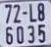

Đang xử lý dòng trên...
Đã lưu bounding box upper: /kaggle/working/upper_bounding_boxes.jpg
Ký tự 0: Không nhận diện được
Ký tự 1: 1
Ký tự 2: Không nhận diện được
Ký tự 3: Không nhận diện được
Ký tự dòng upper: '1'
Đang xử lý dòng dưới...
Đã lưu bounding box lower: /kaggle/working/lower_bounding_boxes.jpg
Ký tự 0: 0
Ký tự 1: Không nhận diện được
Ký tự 2: Không nhận diện được
Ký tự 3: 0
Ký tự dòng lower: '00'
Biển số: '1 - 00'


In [97]:
import cv2
import numpy as np
import torch
from skimage.transform import ProjectiveTransform, warp
from matplotlib import pyplot as plt
from IPython.display import display, Image

# crop
def four_point_transform(image, pts):
    rect = np.array(pts, dtype="float32")
    (tl, tr, br, bl) = rect

    width_top = np.linalg.norm(tr - tl)
    width_bottom = np.linalg.norm(br - bl)
    max_width = max(int(width_top), int(width_bottom))

    height_left = np.linalg.norm(bl - tl)
    height_right = np.linalg.norm(br - tr)
    max_height = max(int(height_left), int(height_right))

    dst = np.array([
        [0, 0],
        [max_width - 1, 0],
        [max_width - 1, max_height - 1],
        [0, max_height - 1]
    ], dtype="float32")

    transform = ProjectiveTransform()
    if not transform.estimate(dst, rect):
        raise ValueError("Error estimating projective transform.")

    warped = warp(image, transform, output_shape=(max_height, max_width))
    return (warped * 255).astype("uint8")

def recognize_LP(image_path, model_path):
    # Load mô hình YOLOv5
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

    # Chạy dự đoán trên ảnh
    results = model(image_path)
    detections = results.xyxy[0]  # Tọa độ các vùng phát hiện (x_min, y_min, x_max, y_max)

    # Đọc ảnh gốc
    image = cv2.imread(image_path)

    # Xử lý nếu phát hiện biển số
    if len(detections) > 0:
        for i, det in enumerate(detections.cpu().numpy()):
            x_min, y_min, x_max, y_max, conf, cls = det
            x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])
            cls = int(cls)  # Lớp của biển số (0: BS1, 1: BS2)

            # Crop ảnh theo tọa độ phát hiện
            cropped_plate = image[y_min:y_max, x_min:x_max]

            # xử lý nâng cao (bird's eye view), thêm tọa độ 4 góc
            pts = [[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]]
            transformed_plate = four_point_transform(image, pts)

            # Đặt tên file dựa trên loại biển số
            class_label = "BS1" if cls == 0 else "BS2"
            output_path = f'plate_{class_label}_{i}.jpg'
            cv2.imwrite(output_path, transformed_plate)
            # print(f" {output_path}")

            # Hiển thị ảnh trực tiếp trong notebook
            display(Image(filename=output_path))

            # Xử lý dựa trên loại biển số
            if class_label == "BS1":  # One-line license plate
                recognized_text = recognize_plate(transformed_plate, single_line=True)
            else:  # Two-line license plate
                recognized_text = recognize_two_line_plate(transformed_plate)

            print(f"Biển số: '{recognized_text}'")
    else:
        print("no detections")

MODEL_PATH = '/kaggle/working/yolov5/runs/train/exp/weights/best.pt'
IMAGE_PATH = '/kaggle/input/testdata/testimages/carlong_0280.png'
# IMAGE_PATH = '/kaggle/input/testdata/testimages/Tgmt_0308.png'
# IMAGE_PATH = '/kaggle/input/testdata/testimages/Tgmt_0118.png'

# recognize_LP("/kaggle/input/testdata/testimages/Tgmt_0308.png", MODEL_PATH)
# 2 dong
# recognize_LP("/kaggle/input/testdata/testimages/Tgmt_0165.png", MODEL_PATH)
recognize_LP("/kaggle/input/testdata/testimages/greenpack_0387.png", MODEL_PATH)

Hay nhầm ký tự/chữ số: '4' thành 'L', 'D' thành '0', '6' thành '5', 'G' thành '6'
Hay không nhận diện được số '1', '4'
Ảnh có điều kiện ánh sáng không tốt, mờ => ảnh hưởng

co` thể thu thập dữ liệu (các ký tự khó nhận diện) huấn luyện lại EasyOCR

## NHẬN DIỆN KÝ TỰ 1-LINE LP BẰNG EASYOCR

In [1]:
import cv2
import numpy as np
import easyocr

def preprocess_plate_image_d1(plate_img):
    if len(plate_img.shape) == 3:
        gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    else:
        gray = plate_img

    # Tăng độ tương phản
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Giảm nhiễu
    denoised = cv2.GaussianBlur(enhanced, (5, 5), 0)

    # Ngưỡng nhị phân thích ứng
    binary = cv2.adaptiveThreshold(
        denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 10
    )

    # Kết nối các thành phần bị đứt gãy
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    binary = cv2.dilate(binary, kernel, iterations=1)

    # Gắn nhãn các thành phần kết nối
    num_labels, labels = cv2.connectedComponents(binary, connectivity=8)

    processed_img = plate_img.copy()
    char_regions = []

    # Loop qua các nhãn đã được gắn
    for label in range(1, num_labels):  # Bỏ qua nhãn nền (label = 0)
        mask = np.zeros(binary.shape, dtype="uint8")
        mask[labels == label] = 255

        # Tìm contour của vùng ký tự
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(contour)

            # Tính các đại lượng kiểm tra
            aspect_ratio = w / float(h)
            solidity = cv2.contourArea(contour) / float(w * h)
            height_ratio = h / float(plate_img.shape[0])

            # Áp dụng quy tắc kiểm tra
            if 0.02 < aspect_ratio < 1.2 and solidity > 0.02 and 0.15 < height_ratio < 1.2:
                char_regions.append((x, y, w, h))
                cv2.rectangle(processed_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Sắp xếp các bounding box từ trái sang phải
    char_regions = sorted(char_regions, key=lambda x: x[0])

    # Lưu ảnh với bounding box
    cv2.imwrite("/kaggle/working/contoured_plate.jpg", processed_img)
    print(f"Đã lưu ảnh bounding box: /kaggle/working/contoured_plate.jpg")

    return binary, char_regions

def recognize_plate(plate_img, single_line=True):
    reader = easyocr.Reader(['en'], gpu=False)  # Khởi tạo EasyOCR
    binary, char_regions = preprocess_plate_image_d1(plate_img)
    cv2.imwrite("/kaggle/working/processed_img.jpg", binary)
    
    if single_line:
        recognized_text = []
        for i, (x, y, w, h) in enumerate(char_regions):
            char_img = plate_img[y:y + h, x:x + w]
            char_img_resized = cv2.resize(char_img, 
                                          (32, 64), 
                                          interpolation=cv2.INTER_CUBIC)
    
            # OCR với EasyOCR
            ocr_results = reader.readtext(char_img_resized, detail=1, allowlist="0123456789ABCDEFGHKLMNPRSTUVXYZ")
            if ocr_results and ocr_results[0][2]: 
                recognized_text.append(ocr_results[0][1])
                print(f"Ký tự {i}: {ocr_results[0][1]}")
            else:
                print(f"Ký tự {i}: Không nhận diện được")
    
        final_text = "".join(recognized_text)
        print(f"Biển số: '{final_text}'")
        return final_text

# CHARACTER REGNITION 2-LINE

## CNN - v2 - colab

https://colab.research.google.com/drive/1oboDm5BeIhoNzZomdtYG12jp3tRbMwP0?usp=sharing

## CNN PREDICTION 2-LINE LP

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-1-6 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


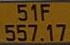

Đã lưu bounding box upper: /kaggle/working/upper_bounding_boxes.jpg
Đã lưu bounding box lower: /kaggle/working/lower_bounding_boxes.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Ký tự 0: Dự đoán 5 (Class 5) với xác suất 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Ký tự 1: Dự đoán 1 (Class 1) với xác suất 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Ký tự 2: Dự đoán F (Class 15) với xác suất 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Ký tự 0: Dự đoán 5 (Class 5) với xác suất 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Ký tự 1: Dự đoán 5 (Class 5) với xác suất 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Ký tự 2: Dự đoán 7 (Class 7) với xác suất 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Ký tự 3: Dự đoán 1 (Class 1) với xác suất 0.92
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Ký tự 4: Dự đoán 7 (Class 7) với xác suất 0.99
Biển số: 51F - 55717


In [15]:
import cv2
import numpy as np
import torch
from tensorflow.keras.models import load_model
from IPython.display import display, Image

ALPHA_DICT = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H',
    18: 'K', 19: 'L', 20: 'M', 21: 'N', 22: 'O', 23: 'P', 24: 'S', 25: 'T',
    26: 'U', 27: 'V', 28: 'X', 29: 'Y', 30: 'Z'
}

# Hàm tiền xử lý ký tự
def preprocess_character(image):
    char_img = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)
    char_img = char_img.astype("float32") / 255.0
    char_img = np.expand_dims(char_img, axis=-1)
    char_img = np.expand_dims(char_img, axis=0)
    return char_img

# Hàm sử dụng mô hình CNN để nhận diện ký tự
def recognize_characters_with_cnn(binary_img, char_regions, cnn_model):
    recognized_text = []
    for i, (x, y, w, h) in enumerate(char_regions):
        char_img = binary_img[y:y + h, x:x + w]
        char_img_preprocessed = preprocess_character(char_img)

        # Dự đoán với CNN
        prediction = cnn_model.predict(char_img_preprocessed)
        predicted_label = np.argmax(prediction, axis=-1)[0]
        predicted_char = ALPHA_DICT[predicted_label]  # Ánh xạ class index sang ký tự

        print(f"Ký tự {i}: Dự đoán {predicted_char} (Class {predicted_label}) với xác suất {np.max(prediction):.2f}")
        recognized_text.append(predicted_char)
    return "".join(recognized_text)

# Hàm nhận diện biển số từ ảnh crop
def recognize_two_line_plate_with_cnn(plate_img, cnn_model):
    upper_binary = preprocess_plate_image(plate_img, line="upper")
    lower_binary = preprocess_plate_image(plate_img, line="lower")

    upper_regions = find_characters_with_bounding_boxes(upper_binary, line="upper")
    lower_regions = find_characters_with_bounding_boxes(lower_binary, line="lower")

    upper_text = recognize_characters_with_cnn(upper_binary, upper_regions, cnn_model)
    lower_text = recognize_characters_with_cnn(lower_binary, lower_regions, cnn_model)

    return f"{upper_text} - {lower_text}".strip()

# Hàm nhận diện biển số từ YOLOv5
def recognize_LP_with_cnn(image_path, yolo_model_path, cnn_model_path):
    # Load mô hình YOLOv5 và CNN
    yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path=yolo_model_path, force_reload=True)
    cnn_model = load_model(cnn_model_path)

    # Chạy YOLOv5 để phát hiện biển số
    results = yolo_model(image_path)
    detections = results.xyxy[0]

    # Đọc ảnh gốc
    image = cv2.imread(image_path)

    # Xử lý phát hiện
    if len(detections) > 0:
        for i, det in enumerate(detections.cpu().numpy()):
            x_min, y_min, x_max, y_max, conf, cls = det
            x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])
            cropped_plate = image[y_min:y_max, x_min:x_max]
            
            output_path = f"/kaggle/working/plate_BS2_cnn_{i}.jpg"
            cv2.imwrite(output_path, cropped_plate) 
            display(Image(filename=output_path))
            
            # Nhận diện biển số
            recognized_text = recognize_two_line_plate_with_cnn(cropped_plate, cnn_model)
            print(f"Biển số: {recognized_text}")
    else:
        print("Không phát hiện được biển số.")

YOLO_MODEL_PATH = '/kaggle/working/yolov5/runs/train/exp/weights/best.pt'
# CNN_MODEL_PATH = '/kaggle/input/cnn_lp_v2/tensorflow2/v2/1/cnn_character_recognition_v2.h5'
CNN_MODEL_PATH = '/kaggle/input/cnn_v3/tensorflow2/default/1/character_recognition_model_v2.h5'

# những ảnh tốt
# IMAGE_PATH = '/kaggle/input/testdata/testimages/greenpack_0492.png'
# IMAGE_PATH = '/kaggle/input/testdata/testimages/greenpack_0515.png'
# IMAGE_PATH = '/kaggle/input/testdata/testimages/greenpack_0547.png'
# IMAGE_PATH = '/kaggle/input/testdata/testimages/greenpack_1515.png'
# IMAGE_PATH = '/kaggle/input/testdata/testimages/Hung_0361.png'
# IMAGE_PATH = '/kaggle/input/testdata/testimages/Dieu_0183.png'
IMAGE_PATH = '/kaggle/input/testdata/testimages/Dieu_0220.png'

recognize_LP_with_cnn(IMAGE_PATH, YOLO_MODEL_PATH, CNN_MODEL_PATH)

Hay nhầm số 0, G,...
số 1 với 7, số 9 và 3
ảnh mờ => x
góc nghiêng => x

In [10]:
def preprocess_plate_image(plate_img, line="full", upscale_factor=5):
    if len(plate_img.shape) == 3:
        gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    else:
        gray = plate_img

    # Phóng to ảnh trước khi tiền xử lý
    resized_img = cv2.resize(gray, None, fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_LINEAR)

    # CLAHE tăng độ tương phản
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(resized_img)

    # Giảm nhiễu
    denoised = cv2.GaussianBlur(enhanced, (7, 7), 0)
    binary = cv2.adaptiveThreshold(
        denoised, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 17, 12
    )

    # Lọc dòng trên dưới
    if line == "upper":
        binary = binary[:binary.shape[0] // 2, :]
    elif line == "lower":
        binary = binary[binary.shape[0] // 2:, :]

    # Thêm giãn (dilate) để nối liền các phần ký tự
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    binary = cv2.dilate(binary, kernel, iterations=1)

    return binary

def filter_outliers_by_size(char_regions, binary_img, k=2):
    """
    Lọc ký tự có kích thước khác nhất = kích thước trung bình và độ lệch chuẩn
    Bước 1: Tính kích thước trung bình của các ký tự
    Lấy diện tích (hoặc chiều rộng và chiều cao) của tất cả các bounding box được phát hiện.
    Tính giá trị trung bình và độ lệch chuẩn (std) của các kích thước này.
    Bước 2: Loại 1 or nhiều ký tự có kích thước khác nhất (thường sẽ là nhiễu)
    Loại bỏ các bounding box có diện tích hoặc kích thước nằm ngoài phạm vi [mean - k * std, mean + k * std], với k là một hệ số (k = 2).
        
    Args:
        char_regions (list): Danh sách các bounding box [(x, y, w, h)].
        binary_img (ndarray): Ảnh nhị phân.
        k (float): Hệ số để xác định phạm vi hợp lệ (mean ± k * std).
    """
    # Tính diện tích (w * h) của tất cả các bounding box
    areas = [w * h for _, _, w, h in char_regions]
    mean_area = np.mean(areas)
    std_area = np.std(areas)

    # Lọc bounding box có diện tích nằm trong phạm vi [mean - k * std, mean + k * std]
    filtered_regions = []
    for i, (x, y, w, h) in enumerate(char_regions):
        area = w * h
        if mean_area - k * std_area <= area <= mean_area + k * std_area:
            filtered_regions.append((x, y, w, h))  # Giữ lại bounding box hợp lệ
        else:
            print(f"Loại bỏ bounding box {i} với diện tích {area:.2f} (ngoài phạm vi [{mean_area - k * std_area:.2f}, {mean_area + k * std_area:.2f}])")

    return filtered_regions
    
def find_characters_with_bounding_boxes(binary_img, line):
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    char_regions = []
    processed_img = cv2.cvtColor(binary_img, cv2.COLOR_GRAY2BGR)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h)
        area = w * h
        solidity = cv2.contourArea(cnt) / float(area)
        height_ratio = h / float(binary_img.shape[0])

        # Điều chỉnh padding động dựa trên kích thước ký tự
        padding_w = int(0.15 * w) if w > 20 else 5  # Padding thay đổi theo chiều rộng
        padding_h = int(0.15 * h) if h > 30 else 5  # Padding thay đổi theo chiều cao

        # Cập nhật điều kiện lọc
        if 0.2 < aspect_ratio < 1.5 and area > 100 and 0.35 < height_ratio < 1.0 and solidity > 0.1:
            x_min = max(x - padding_w, 0)
            y_min = max(y - padding_h, 0)
            x_max = min(x + w + padding_w, binary_img.shape[1])
            y_max = min(y + h + padding_h, binary_img.shape[0])

            char_regions.append((x_min, y_min, x_max - x_min, y_max - y_min))
            
    char_regions = filter_outliers_by_size(char_regions, binary_img)

    for x, y, w, h in char_regions:
        cv2.rectangle(processed_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Sắp xếp bounding boxes từ trái sang phải
    char_regions = sorted(char_regions, key=lambda x: x[0])

    # Lưu ảnh có bounding box
    output_path = f"/kaggle/working/{line}_bounding_boxes.jpg"
    cv2.imwrite(output_path, processed_img)
    print(f"Đã lưu bounding box {line}: {output_path}")

    return char_regions

# def recognize_entire_line_with_boxes(plate_img, line, upscale_factor=5):
#     reader = easyocr.Reader(['en'], gpu=False)

#     # Xác định dòng trên hoặc dòng dưới
#     binary_line = preprocess_plate_image(plate_img, line=line)
#     char_regions = find_characters_with_bounding_boxes(binary_line, line)

#     # Nhận diện từng ký tự dựa trên bounding box
#     recognized_text = []
#     for i, (x, y, w, h) in enumerate(char_regions):
#         # Crop vùng ký tự từ ảnh gốc
#         char_img = binary_line[y:y + h, x:x + w]
    
#         # Resize để OCR có thể nhận diện tốt hơn
#         char_img_resized = cv2.resize(char_img, None, fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_CUBIC)
    
#         # Cải thiện độ tương phản
#         enhanced_char = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(char_img_resized)
#         cv2.imwrite(f"/kaggle/working/char_{line}_{i}.jpg", enhanced_char)
        
#         # Áp dụng OCR trên ký tự
#         ocr_results = reader.readtext(
#             enhanced_char,
#             detail=1,
#             allowlist="0123456789ABCDEFGHKLMNPQRSTUVXYZ"
#         )
#         if ocr_results and ocr_results[0][2]:  # Confidence
#             recognized_text.append(ocr_results[0][1])
#             print(f"Ký tự {i}: {ocr_results[0][1]}")
#         else:
#             print(f"Ký tự {i}: Không nhận diện được")
#     final_text = "".join(recognized_text)
#     print(f"Ký tự dòng {line}: '{final_text}'")
#     return final_text
    
# def recognize_two_line_plate(plate_img):
#     print("Đang xử lý dòng trên...")
#     recognized_text_upper = recognize_entire_line_with_boxes(plate_img, line="upper")

#     print("Đang xử lý dòng dưới...")
#     recognized_text_lower = recognize_entire_line_with_boxes(plate_img, line="lower")

#     # Ghép nối kết quả từ dòng trên và dòng dưới
#     return f"{recognized_text_upper} - {recognized_text_lower}".strip()

## TEST

In [39]:
import cv2
import numpy as np
from skimage.filters import threshold_local
from skimage.measure import label as measure_label
import imutils
from matplotlib import pyplot as plt

def convert2Square(image):
    # Chuyển ảnh về dạng vuông
    size = max(image.shape[:2])
    square_image = np.zeros((size, size), dtype="uint8")
    offset_x = (size - image.shape[1]) // 2
    offset_y = (size - image.shape[0]) // 2
    square_image[offset_y:offset_y + image.shape[0], offset_x:offset_x + image.shape[1]] = image
    return square_image

def segment_characters_hsv(plate_image):
    # Chuyển sang HSV và lấy kênh Value
    V = cv2.split(cv2.cvtColor(plate_image, cv2.COLOR_BGR2HSV))[2]

    # Áp dụng Adaptive Threshold với offset thấp hơn
    T = threshold_local(V, 15, offset=6, method="gaussian")
    thresh = (V > T).astype("uint8") * 255

    # Chuyển pixel đen thành trắng
    thresh = cv2.bitwise_not(thresh)

    # Resize và làm mờ ảnh
    thresh = imutils.resize(thresh, width=400)
    thresh = cv2.medianBlur(thresh, 5)

    # Sử dụng kernel lớn hơn để loại bỏ nhiễu
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Connected Components Analysis
    labels = measure_label(thresh, connectivity=2, background=0)

    # Duyệt qua các nhãn và tách ký tự
    candidates = []
    for label in np.unique(labels):
        if label == 0:  # Bỏ qua background
            continue

        # Tạo mask để lưu vị trí ký tự
        mask = np.zeros(thresh.shape, dtype="uint8")
        mask[labels == label] = 255

        # Tìm contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            (x, y, w, h) = cv2.boundingRect(contour)

            # Áp dụng các quy tắc lọc ký tự
            aspectRatio = w / float(h)
            solidity = cv2.contourArea(contour) / float(w * h)
            heightRatio = h / float(plate_image.shape[0])

            # Điều kiện lọc cải tiến
            if 0.1 < aspectRatio < 1.0 and solidity > 0.1 and 0.35 < heightRatio < 2.0:
                candidate = np.array(mask[y:y + h, x:x + w])
                square_candidate = convert2Square(candidate)
                square_candidate = cv2.resize(square_candidate, (28, 28), cv2.INTER_AREA)
                candidates.append((square_candidate, (y, x, w, h)))  # Thêm thông tin bounding box

    # Vẽ bounding box trên ảnh gốc
    processed_image = plate_image.copy()
    for _, (y, x, w, h) in candidates:
        cv2.rectangle(processed_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Lưu ảnh biển số với bounding box
    output_path = "/kaggle/working/plate_with_bounding_boxes.jpg"
    cv2.imwrite(output_path, processed_image)
    print(f"Ảnh biển số với bounding box đã lưu tại: {output_path}")

    # Sắp xếp ký tự theo dòng và thứ tự trong dòng
    lines = {}
    for char, (y, x, _, _) in candidates:
        line_key = y // 50  # Giả định khoảng cách giữa các dòng là 50 pixels
        if line_key not in lines:
            lines[line_key] = []
        lines[line_key].append((char, x))

    # Sắp xếp từng dòng theo x và gộp lại
    sorted_characters = []
    for line_key in sorted(lines.keys()):
        sorted_line = sorted(lines[line_key], key=lambda c: c[1])  # Sắp xếp theo x
        sorted_characters.extend([c[0] for c in sorted_line])

    return sorted_characters

# Đọc ảnh biển số
plate_image = cv2.imread('/kaggle/working/plate_BS2_0.jpg')

# Phân đoạn ký tự
characters = segment_characters_hsv(plate_image)

# Hiển thị và lưu các ký tự
# for i, char in enumerate(characters):
#     plt.imshow(char, cmap="gray")
#     plt.title(f"Ký tự {i+1}")
#     plt.axis('off')
#     plt.show()

#     # Lưu ký tự
#     char_path = f'/kaggle/working/char_{i+1}.png'
#     cv2.imwrite(char_path, char)
#     print(f"Ký tự đã lưu: {char_path}")

Ảnh biển số với bounding box đã lưu tại: /kaggle/working/plate_with_bounding_boxes.jpg


In [13]:
from IPython.display import Image, display
import os

image_dir = "/kaggle/working"
image_files = [f for f in os.listdir(image_dir) if f.startswith("char_") and f.endswith(".png")]
image_files.sort(key=lambda x: int(x[5:-4]))

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    display(Image(filename=image_path))

## XÓA 

In [43]:
import os

image_dir = "/kaggle/working/"
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

if image_files: # Kiểm tra xem danh sách có rỗng không
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        try:
            os.remove(image_path)
            print(f"Đã xóa: {image_path}")
        except OSError as e:
            print(f"Lỗi khi xóa {image_path}: {e}")
else:
    print("Không có tệp nào để xóa.")

Đã xóa: /kaggle/working/char_lower_1.jpg
Đã xóa: /kaggle/working/upper_resized.jpg
Đã xóa: /kaggle/working/upper_enhanced.jpg
Đã xóa: /kaggle/working/plate_BS2_0.jpg
Đã xóa: /kaggle/working/lower_binary.jpg
Đã xóa: /kaggle/working/lower_resized.jpg
Đã xóa: /kaggle/working/char_lower_2_sharpened.jpg
Đã xóa: /kaggle/working/char_upper_0_sharpened.jpg
Đã xóa: /kaggle/working/char_lower_3_sharpened.jpg
Đã xóa: /kaggle/working/lower_enhanced.jpg
Đã xóa: /kaggle/working/char_upper_1.jpg
Đã xóa: /kaggle/working/char_upper_2_sharpened.jpg
Đã xóa: /kaggle/working/char_lower_1_sharpened.jpg
Đã xóa: /kaggle/working/char_upper_2.jpg
Đã xóa: /kaggle/working/lower_bounding_boxes.jpg
Đã xóa: /kaggle/working/char_lower_0_sharpened.jpg
Đã xóa: /kaggle/working/char_upper_1_sharpened.jpg
Đã xóa: /kaggle/working/char_lower_2.jpg
Đã xóa: /kaggle/working/char_upper_0.jpg
Đã xóa: /kaggle/working/upper_binary.jpg
Đã xóa: /kaggle/working/char_lower_0.jpg
Đã xóa: /kaggle/working/upper_bounding_boxes.jpg
Đã xóa:

In [ ]:
def create_background_images(plate_image, output_dir, base_name, num_samples=20):
    h, w = plate_image.shape[:2]
    for i in range(num_samples):
        x1 = random.randint(0, w // 2)
        y1 = random.randint(0, h // 2)
        x2 = random.randint(x1 + 10, min(w, x1 + 50))
        y2 = random.randint(y1 + 10, min(h, y1 + 50))
        
        # Cắt một vùng ngẫu nhiên
        background = plate_image[y1:y2, x1:x2]
        background = cv2.resize(background, (28, 28))
        
        # Tạo tên tệp duy nhất
        file_name = f"{base_name}_bg_{i}.jpg"
        file_path = os.path.join(output_dir, file_name)
        
        # Lưu ảnh
        cv2.imwrite(file_path, background)

def generate_backgrounds(input_folder, output_folder, num_samples_per_image=20):
    # Tạo thư mục lưu background nếu chưa tồn tại
    os.makedirs(output_folder, exist_ok=True)

    # Duyệt qua tất cả các ảnh trong thư mục
    for img_file in os.listdir(input_folder):
        if img_file.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(input_folder, img_file)
            image = cv2.imread(image_path)

            if image is not None:
                print(f"Đang xử lý ảnh: {image_path}")
                base_name = os.path.splitext(img_file)[0]  # Lấy tên tệp gốc (không có phần mở rộng)
                # Tạo background từ ảnh
                create_background_images(image, output_folder, base_name, num_samples=num_samples_per_image)
            else:
                print(f"Lỗi đọc ảnh: {image_path}")

In [30]:
import cv2
import numpy as np
import torch
import os
from skimage.transform import ProjectiveTransform, warp
from tensorflow.keras.preprocessing.image import ImageDataGenerator

MODEL_PATH = '/kaggle/working/yolov5/runs/train/exp/weights/best.pt'
IMAGE_DIR = '/kaggle/input/imagestest'
AUGMENTED_DIR = '/kaggle/working/augmented_characters'

os.makedirs(AUGMENTED_DIR, exist_ok=True)

# Tăng cường dữ liệu
def augment_character(image, save_dir, base_name, num_aug=5):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        fill_mode='nearest'
    )
    image = image.reshape((1, *image.shape, 1))  # Thêm batch và kênh

    i = 0
    for batch in datagen.flow(image, batch_size=1, save_to_dir=save_dir, save_prefix=base_name, save_format='png'):
        i += 1
        if i >= num_aug:
            break

model = torch.hub.load('ultralytics/yolov5', 'custom', path=MODEL_PATH, force_reload=True)

# Duyệt qua tất cả ảnh trong thư mục
for img_file in os.listdir(IMAGE_DIR):
    if img_file.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(IMAGE_DIR, img_file)
        image = cv2.imread(image_path)

        # Chạy dự đoán YOLO
        results = model(image_path)
        detections = results.xyxy[0].cpu().numpy()

        if len(detections) > 0:
            for i, det in enumerate(detections):
                x_min, y_min, x_max, y_max, conf, cls = det
                x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])
                cls = int(cls)

                # Crop biển số
                cropped_plate = image[y_min:y_max, x_min:x_max]

                # Nếu muốn xử lý nâng cao (bird's eye view)
                pts = [[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]]
                transformed_plate = four_point_transform(image, pts)

                # Phân đoạn ký tự từ biển số
                characters = segment_characters_hsv(transformed_plate)

                # Lưu từng ký tự đã phân đoạn vào thư mục tăng cường
                for j, char in enumerate(characters):
                    char_resized = cv2.resize(char, (28, 28))
                    char_resized = char_resized.astype('float32') / 255.0  # Chuẩn hóa
                    char_base_name = f'{os.path.splitext(img_file)[0]}_char_{i}_{j}'
                    augment_character(char_resized, AUGMENTED_DIR, char_base_name)
                    print(f"Lưu ký tự phân đoạn và tăng cường: {char_base_name}")
        else:
            print(f"No detections for image: {img_file}")

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-12-31 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0658_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0389_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0389_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0389_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0389_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0389_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0389_char_0_5
Lưu ký tự phân đoạn và tăng cư

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0716_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0716_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0716_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0716_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0716_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0716_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0716_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0716_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0172_char_2_1
Lưu ký tự phân đoạn và tăng

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0057_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0193_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0193_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0193_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0193_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0193_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0193_char_

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0193_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0193_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0193_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0026_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0026_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0026_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0026_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0026_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0026_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0026_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0026_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0026_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0567_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0567_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0567_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0567_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0567_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0567_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0567_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0567_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0567_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0378_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0378_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0378_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0378_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0378_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0378_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0378_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0378_char_0

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0715_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0417_char_0_12
Lưu ký tự phân đoạn và tăng cường: carlong_0795_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0795_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0795_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0795_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0795_char_0_4
Lưu ký tự 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0622_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0622_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0622_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0622_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0622_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0622_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0622_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0622_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0461_char_0_12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0002_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0002_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0002_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0002_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0002_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0002_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0002_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0002_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0002_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0400_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0591_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0591_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0591_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0591_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0591_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0591_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0591_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0799_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0799_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0799_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0799_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0799_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0799_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0799_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0799_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0799_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0337_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0337_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0337_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0337_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0337_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0337_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0337_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0337_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0337_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0449_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0289_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0289_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0289_char_0_2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0289_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0289_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0289_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0289_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0289_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0557_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0414_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0482_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0482_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0482_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0482_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0482_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0482_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0482_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0482_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0482_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0721_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0445_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0445_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0445_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0445_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0445_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0445_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0445_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0445_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0445_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0461_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0461_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0461_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0461_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0461_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0461_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0461_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0461_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0341_char_0_9
Lưu 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0690_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_2_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_2_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_2_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0095_char_2_4
Lưu ký tự phân đoạn và tăng 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0425_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0463_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0494_char_1_7
Lưu ký tự phân đoạn và tăng 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0653_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0653_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0653_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0653_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0653_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0653_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0653_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0653_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0653_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0772_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0772_char_0_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0772_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0772_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0772_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0772_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0772_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0772_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0519_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0281_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0281_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0281_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0281_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0281_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0281_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0281_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0281_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0281_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0900_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0900_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0900_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0900_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0900_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0900_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0900_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0900_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0570_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0570_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0570_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0570_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0570_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0570_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0570_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0570_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0575_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0575_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0575_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0575_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0575_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0575_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0575_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0575_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0575_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0694_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0694_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0694_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0694_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0694_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0694_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0694_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0694_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0694_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0659_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0663_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0663_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0663_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0663_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0663_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0663_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0663_char_0_6
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0195_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0195_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0195_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0195_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0195_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0195_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0195_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0195_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0643_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0333_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0333_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0333_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0333_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0333_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0333_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0333_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0333_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0333_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0384_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0617_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0617_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0617_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0617_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0617_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0617_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0617_char_0_6
Lưu ký tự phân đo

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0056_char_1_5
Lưu ký tự phân đoạn và tăn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0856_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0856_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0856_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0856_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0856_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0856_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0856_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0856_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0856_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0692_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0692_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0692_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0692_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0692_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0692_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0692_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0692_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0692_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0008_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0553_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0406_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0406_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0406_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0406_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0406_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0406_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0406_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0406_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0398_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0398_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0398_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0398_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0398_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0398_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0398_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0398_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0672_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0672_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0672_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0672_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0672_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0672_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0672_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0672_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0672_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0332_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0332_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0332_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0332_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0332_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0332_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0332_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0332_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0210_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0210_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0210_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0210_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0210_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0210_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0210_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0210_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0535_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0535_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0535_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0535_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0535_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0535_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0535_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0535_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0535_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0646_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_13
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_0_14
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0120_char_1_2
Lưu ký tự phân đoạn và 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0259_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0259_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0259_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0259_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0259_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0259_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0259_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0841_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0841_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0841_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0841_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0841_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0841_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0841_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0841_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0569_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0569_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0569_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0569_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0569_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0569_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0569_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0569_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0569_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_1_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_2_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_2_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_2_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_2_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_2_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_2_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0130_char_2_7
Lưu ký tự phân đoạn và tăng 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0722_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0796_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0796_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0796_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0796_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0796_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0796_char_0_5
Lưu ký tự phân đoạn và tăng cư

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0851_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0851_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0851_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0851_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0851_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0851_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0851_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0851_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0018_char_0_9
Lưu 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0608_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0608_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0608_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0608_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0608_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0608_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0608_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0608_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0975_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0975_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0975_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0975_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0975_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0975_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0975_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0975_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0492_char_1_5
Lưu ký tự phân đoạn và tăn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0691_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0691_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0486_char_1_3
Lưu ký tự phân đ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0144_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0028_char_0_12
Lưu ký tự phân đoạn và tăng cường: carlong_0939_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0939_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0939_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0939_char_0_3
Lư

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0128_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0128_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0128_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0128_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0128_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0128_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0128_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0128_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0293_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0293_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0293_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0293_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0293_char_0_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0101_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0101_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0101_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0101_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0101_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0101_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0101_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0101_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0101_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0610_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0610_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0610_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0610_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0610_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0610_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0610_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0610_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0427_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0410_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0410_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0410_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0410_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0410_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0410_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0410_char_0_6
Lưu ký tự phân đoạn và tăng cườ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0677_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0677_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0677_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0677_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0677_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0677_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0677_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0677_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_12
Lưu ký tự phân đoạn và tăng cường: greenpack_0121_char_0_13
Lưu ký tự phân đoạn và tăng cường: carlong_0484_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0484_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0484_char_0_2

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0005_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0005_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0005_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0005_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0005_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0005_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0005_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0005_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0005_char_1_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0375_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0375_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0375_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0375_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0375_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0375_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0375_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0375_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0375_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0753_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0753_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0753_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0753_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0753_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0753_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0753_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0527_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0527_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0527_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0527_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0527_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0527_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0527_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0527_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0527_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0249_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0249_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0249_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0249_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0249_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0249_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0249_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0249_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0249_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0367_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0367_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0367_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0367_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0367_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0367_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0367_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0367_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0847_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0847_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0847_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0847_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0847_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0847_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0847_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0847_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0847_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0442_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0442_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0442_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0442_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0442_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0442_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0442_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0442_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0492_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0290_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0290_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0290_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0290_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0290_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0290_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0290_char_0_6
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0278_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0278_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0278_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0278_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0278_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0278_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0278_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0278_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0367_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0367_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0367_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0367_char_0_3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0367_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0367_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0367_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0367_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0367_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0208_char_1_9
Lưu ký tự phân đoạn và tăng cường: carlong_0943_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0943_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0943_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0943_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0943_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0943_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0943_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0943_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0943_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0231_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0231_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0231_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0231_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0231_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0231_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0231_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0231_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0231_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0359_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0189_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0189_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0189_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0189_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0189_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0189_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0326_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0158_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0415_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0415_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0415_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0415_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0415_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0415_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0415_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0415_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0415_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0586_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0586_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0586_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0586_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0586_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0586_char_0_5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0586_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0586_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0079_char_1_6
Lưu ký tự phân đoạn và

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0439_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0439_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0439_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0439_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0439_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0439_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0439_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0439_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0979_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0979_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0979_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0979_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0979_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0979_char_0_5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0979_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0979_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0360_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0368_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0368_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0368_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0368_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0368_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0602_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0602_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0602_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0602_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0602_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0602_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0602_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0602_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0271_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0595_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0652_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0652_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0652_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0652_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0652_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0652_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0652_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0652_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0321_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0321_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0321_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0321_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0321_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0321_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0321_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0321_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0017_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0017_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0017_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0017_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0017_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0017_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0017_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0017_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0724_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0724_cha

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0724_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0724_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0287_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0682_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0682_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0682_char_0_2
L

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0682_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0682_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0198_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0198_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0198_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0198_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0198_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0198_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0198_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0198_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0198_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0066_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0475_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0475_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0475_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0475_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0475_char

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0398_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_12
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_13
Lưu ký tự phân đoạn và tăng cường: greenpack_0701_char_0_14


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0193_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0193_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0193_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0193_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0193_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0193_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0193_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0193_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0193_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_0_8
Lưu ký tự phân đoạn và tăng 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0141_char_2_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0499_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0183_char_0_13
Lưu ký tự phân đoạn và tăng cường: carlong_0573_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0573_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0573_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0573_char_0_3
Lưu ký tự ph

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0101_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0101_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0101_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0101_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0101_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0101_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0101_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0538_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0733_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0733_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0733_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0733_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0733_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0733_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0733_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0733_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0733_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0237_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0200_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0147_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0501_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0501_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0501_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0501_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0501_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0501_char_0_5
Lưu ký t

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0641_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0641_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0641_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0641_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0641_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0641_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0641_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0641_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0641_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0669_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0669_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0669_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0669_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0669_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0669_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0669_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0669_char_0_7
Lưu ký tự phâ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0328_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_13
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_0_14
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0185_char_1_2
Lưu ký tự phân đoạn và 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0601_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_4
Lưu k

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_12
Lưu ký tự phân đoạn và tăng cường: carlong_0286_char_0_13
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0575_char_0_10
Lưu 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0865_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0865_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0865_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0865_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0865_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0865_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0865_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0865_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0045_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0422_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0018_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0465_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0465_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0465_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0465_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0465_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0465_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0465_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0465_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0465_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0536_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0536_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0536_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0536_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0536_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0536_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0536_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0536_char_0_7
Lưu ký tự phâ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0351_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0351_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0351_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0351_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0351_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0351_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0351_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0351_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0351_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0217_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0539_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0539_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0539_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0539_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0539_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0539_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0539_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0539_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0770_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0770_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0770_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0770_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0770_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0770_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0770_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0770_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0770_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0480_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0480_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0480_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0480_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0480_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0480_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0480_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0480_char_0_7
Lưu ký tự phân 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0403_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0529_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0529_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0529_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0529_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0529_char_0_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0529_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0529_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0529_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0434_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0434_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0434_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0434_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0434_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0434_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0322_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0322_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0322_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0322_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0322_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0322_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0322_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0322_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0309_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0840_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0840_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0840_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0840_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0840_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0840_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0840_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0840_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0181_char_0_12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0467_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0986_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0105_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0105_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0105_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0105_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0105_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0105_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0105_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0105_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0105_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0239_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0239_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0239_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0239_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0239_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0563_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0563_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0563_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0563_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0563_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0563_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0563_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0563_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0699_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0699_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0699_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0699_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0699_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0699_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0699_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0699_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0699_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0350_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_5
Lưu ký tự phân đoạn và tăng

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0285_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0265_char_1_0
Lưu ký tự phân đoạn và t

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0627_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0083_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0083_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0083_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0083_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0083_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0083_char_2_1
Lưu ký tự phân đoạn và tăn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_12
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_13
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_14
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_char_0_15
Lưu ký tự phân đoạn và tăng cường: greenpack_0186_

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0276_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0276_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0276_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0276_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0276_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0473_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0473_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0473_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0473_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0473_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0473_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0473_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0473_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0473_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0491_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0491_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0491_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0491_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0491_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0491_char_0_5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0712_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0635_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0635_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0635_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0635_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0635_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0635_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0635_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0635_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0098_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0098_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0098_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0098_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0098_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0098_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0098_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0098_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0098_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0402_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0402_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0402_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0402_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0402_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0402_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0402_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0402_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0720_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0720_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0720_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0720_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0720_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0720_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0720_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0720_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0720_char_0_8
Lưu ký tự phân đoạn và tăng cườ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0568_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0654_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0548_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0548_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0548_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0548_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0548_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0548_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0548_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0548_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0548_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0774_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0959_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0959_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0959_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0959_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0959_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0959_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0959_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0959_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0373_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0373_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0373_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0373_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0373_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0373_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0373_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0373_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0141_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0141_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0141_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0141_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0141_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0141_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0141_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0141_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0141_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0110_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0110_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0110_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0110_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0110_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0110_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0110_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0110_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0278_char_1_3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0047_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0551_char_0_12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0893_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0893_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0893_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0893_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0893_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0893_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0893_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0893_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0915_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0915_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0915_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0915_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0915_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0915_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0915_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0915_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0915_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_12
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_13
Lưu ký tự phân đoạn và tăng cường: greenpack_0174_char_0_14
Lưu ký tự phân đoạn và tăng cường: carlong_0878_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0878_char_

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0878_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0878_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0878_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0878_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0317_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0317_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0317_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0317_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0317_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0317_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0317_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0317_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0340_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0340_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0340_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0340_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0936_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0936_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0936_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0936_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0936_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0936_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0936_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0936_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0936_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0385_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0190_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0399_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0982_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0982_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0982_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0982_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0982_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0982_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0982_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0982_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0573_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0685_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0398_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0398_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0398_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0398_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0398_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0398_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0398_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0344_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0344_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0344_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0344_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0344_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0344_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0344_char_1_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0457_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0479_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0479_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0479_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0479_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0479_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0479_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0479_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0479_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0246_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0246_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0246_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0246_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0246_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0246_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0246_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0246_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0246_char_0_8
Lưu ký tự phâ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0437_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0444_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0444_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0444_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0444_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0444_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0444_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0444_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0444_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0444_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0971_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0971_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0971_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0971_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0971_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0971_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0971_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0971_char_0_7
Lưu ký tự phân đoạn và tăng cườ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0424_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0424_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0424_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0424_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0424_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0424_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0424_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0424_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0506_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0363_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0363_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0363_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0363_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0363_char_0_4
Lưu k

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0042_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0417_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0853_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0853_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0853_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0853_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0853_char_0_4
Lưu k

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0218_char_0_12
Lưu ký tự phân đoạn và tăng cường: carlong_0413_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0413_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0413_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0413_char_0_3
Lư

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0534_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0534_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0534_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0534_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0534_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0534_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0534_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0766_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0817_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0403_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0403_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0403_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0403_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0403_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0403_char_0_5
Lưu ký tự phân đoạn và tăng cư

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0617_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0617_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0617_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0617_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0617_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0617_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0617_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0617_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0212_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0212_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0212_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0212_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0212_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0212_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0212_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0238_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0074_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0074_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0074_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0074_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0074_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0074_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0074_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0074_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0204_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0204_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0204_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0204_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0204_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0204_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0204_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0280_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0280_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0280_char_0_2
Lưu

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0883_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0946_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0946_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0946_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0946_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0946_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0946_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0946_char_0_6
Lưu ký tự phân đoạn và tăng cườ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0112_char_2_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0310_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0493_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0366_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0147_char_1_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0637_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0495_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0495_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0495_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0495_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0495_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0495_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0495_char_0_6
Lưu ký tự phân đoạn và tăng cườn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0360_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0360_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0360_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0360_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0360_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0360_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0360_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0360_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0200_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0200_char_0_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0200_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0200_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0200_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0200_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0200_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0200_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0377_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0067_char_0_0
Lưu ký tự phân đoạn và tăng cườn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0560_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0639_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0639_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0639_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0639_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0639_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0639_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0639_char_0_6
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0434_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0434_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0434_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0434_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0434_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0434_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0434_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0434_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0434_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0022_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0239_char_0

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0471_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0581_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_0_

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0416_char_1_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0516_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0275_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0464_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0087_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0087_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0087_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0087_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0087_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0087_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0087_char_1_1
Lưu ký tự phân đoạn và tăng cườn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0465_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0222_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0222_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0222_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0222_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0222_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0222_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0458_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0970_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_2_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_2_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_3_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_3_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_3_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_3_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_3_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0075_char_4_0
Lưu ký tự phân đoạn và tăng 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0544_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0544_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0544_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0544_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0544_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0544_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0544_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0544_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0759_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0759_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0759_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0759_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0759_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0759_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0759_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0759_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0759_char_0_8
Lưu ký tự phân đoạn và tăng cườ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0073_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0515_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0630_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0630_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0630_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0630_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0630_char_0_4
Lưu k

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0710_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0710_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0710_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0710_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0710_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0710_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0710_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0710_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0710_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0455_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0455_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0455_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0455_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0455_char_0_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0432_char_0_12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0504_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0562_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0562_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0562_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0562_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0562_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0562_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0562_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0562_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0702_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0702_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0702_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0702_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0702_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0702_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0702_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0702_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0577_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0577_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0577_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0577_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0577_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0577_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0577_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0577_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0465_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0465_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0465_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0465_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0465_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0465_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0465_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0465_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0465_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0069_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0708_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0887_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0792_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0792_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0792_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0792_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0792_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0792_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0792_char_0_6
Lưu ký tự phân đoạn và tăng cườ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0494_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0612_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0612_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0612_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0612_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0612_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0612_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0612_char_0_6
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0124_char_2_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0635_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0031_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0031_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0031_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0031_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0031_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0031_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0031_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0031_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0031_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0459_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0459_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0459_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0459_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0459_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0459_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0459_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0459_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0103_char_0_12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0435_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0388_char_1_11
Lưu ký tự phân đoạn và t

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0058_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0058_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0058_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0058_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0058_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0058_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0058_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0058_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0058_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0370_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0370_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0370_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0370_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0370_char_0_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0040_char_1_6
Lưu ký tự phân đoạn và tăng

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0334_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0334_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0334_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0334_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0334_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0334_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0334_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0334_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0334_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0718_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0718_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0718_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0718_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0718_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0718_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0718_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0718_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0718_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0320_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_11
Lưu ký tự phân đoạn và tăng cường: carlong_0703_char_0_12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0413_char_0_12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0616_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0616_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0616_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0616_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0616_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0616_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0616_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0616_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0616_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0016_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0294_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0294_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0294_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0294_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0294_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0294_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0294_char_0_6
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0294_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0462_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0462_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0462_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0462_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0462_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0462_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0462_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0462_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0462_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0804_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0804_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0804_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0804_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0804_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0804_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0804_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0804_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0804_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0426_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0519_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0607_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0451_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0451_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0451_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0451_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0451_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0451_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0451_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0451_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_12
Lưu ký tự phân đoạn và tăng cường: greenpack_0391_char_0_13


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0298_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0298_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0298_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0298_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0298_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0298_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0298_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0298_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0298_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0294_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_0_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_3_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_3_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_3_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_3_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_3_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0103_char_3_5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0466_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0305_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0044_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0044_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0044_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0044_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0044_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0044_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0044_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0044_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0044_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0237_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0237_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0237_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0237_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0237_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0237_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0237_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0237_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0427_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0427_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0427_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0427_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0427_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0427_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0427_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0427_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0427_char_0_8
Lưu ký tự phân đoạn và tăng cường: gr

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0619_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0590_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0207_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0207_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0207_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0207_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0207_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0207_char_0_5
Lưu ký tự phân đoạn và tăn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_12
Lưu ký tự phân đoạn và tăng cường: greenpack_0011_char_0_13


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0870_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0870_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0870_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0870_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0870_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0870_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0870_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0710_char_0_9
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0942_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0942_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0942_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0942_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0942_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0942_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0516_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0516_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0516_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0516_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0516_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0516_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0516_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0516_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0504_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0504_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0504_char_0_2
Lưu ký tự phân đoạn và tăng cườ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0199_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0639_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0639_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0639_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0639_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0639_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0639_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0639_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0639_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0639_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0063_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0334_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0334_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0334_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0334_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0334_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0334_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0334_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0334_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0334_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0240_char_1_4
Lưu ký tự phân đoạn và tă

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0592_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0592_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0592_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0592_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0592_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0592_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0592_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0592_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0592_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0662_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0426_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0263_char_1_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0833_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0833_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0833_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0833_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0833_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0833_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0833_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0833_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_0_2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0407_char_1_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_13
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_0_14
Lưu ký tự phân đoạn và tăng cường: Dieu_0389_char_1_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0140_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0317_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0317_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0317_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0317_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0317_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0317_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0317_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0317_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0317_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0003_char_1_3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0842_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0842_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0842_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0842_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0842_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0842_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0842_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0842_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0114_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0114_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0114_char_1_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0114_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0114_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0114_char_1_4
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0876_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0649_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0649_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0649_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0649_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0649_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0649_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0649_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0649_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0725_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0725_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0725_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0725_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0725_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0725_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0725_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0725_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_0_13
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0092_char_1_3
Lưu ký tự phân đoạn và t

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0010_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0381_char_2_0
Lưu ký tự phân đoạn và tăn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0559_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0559_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0559_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0559_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0112_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0137_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0292_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0508_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0549_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0571_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0571_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0571_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0571_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0571_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0571_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0571_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0571_char_0_7
Lưu ký tự phân đoạn và tăng cườ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0258_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0699_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0443_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0108_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0108_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0108_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0108_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0108_char_0_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0108_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0108_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0108_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0108_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0474_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0416_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0416_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0416_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0416_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0416_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0416_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0416_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0948_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0948_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0948_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0948_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0948_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0948_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0948_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0948_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0948_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0439_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0439_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0439_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0439_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0439_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0439_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0439_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0439_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0705_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0705_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0705_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0705_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0705_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0705_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0705_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0111_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0111_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0111_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0111_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0111_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0111_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0111_char_1_2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0713_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_0_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0288_char_1_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0303_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0191_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0191_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0191_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0191_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0191_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0191_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0191_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0191_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0191_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_1_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0196_char_1_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0189_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0293_char_0_12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0247_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0229_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_13
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_14
Lưu ký tự phân đoạn và tăng cường: Dieu_0479_char_0_15


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_1_0
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_1_1
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_1_2
Lưu ký tự phân đoạn và tăng cường: carlong_0310_char_1_3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0003_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0003_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0003_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0003_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0003_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0003_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0003_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0003_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0003_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_1_0
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_1_1
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_1_2
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_1_3
Lưu ký tự phân đoạn và tăng cường: carlong_0731_char_1_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0383_char_1_2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0401_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0473_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0473_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0473_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0473_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0473_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0473_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0473_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0473_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0473_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_13
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_0_14
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0077_char_1_2
Lưu ký tự phân đoạn và 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_2_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0219_char_2_2
Lưu ký tự phân đoạn và tă

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0164_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0164_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0164_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0164_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0164_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0164_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0164_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0164_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0164_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0463_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0463_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0463_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0463_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0463_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0463_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0463_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0463_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0463_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0777_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0777_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0777_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0777_char_0_3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0777_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0777_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0777_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0777_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0448_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0886_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0429_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0713_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0346_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0346_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0346_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0346_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0346_char_0_4
Lưu ký 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0983_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0983_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0983_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0983_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0983_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0983_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0983_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0983_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0477_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0477_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0477_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0477_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0477_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0477_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0477_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0477_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0477_char_0_8
Lưu ký tự phâ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0689_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0689_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0689_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0689_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0689_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0689_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0689_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0689_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0689_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0220_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0291_char_0_12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0323_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0211_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0211_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0211_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0211_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0211_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0211_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0211_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_02

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0322_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0322_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0322_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0322_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0322_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0322_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0322_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0322_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0322_char_1_0
Lưu ký tự phân đoạn và tăng cường: carlong_0871_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0871_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0871_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0871_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0871_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0871_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0871_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0871_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0648_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0224_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0224_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0224_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0224_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0224_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0224_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0224_char_0

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0406_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0406_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0406_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0406_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0406_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0406_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0406_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0406_char_1_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0706_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0168_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0742_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0742_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0742_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0742_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0742_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0742_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0742_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0742_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0742_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0007_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0007_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0007_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0007_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0007_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0007_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0007_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0007_char_0_7
Lưu ký tự phân 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0203_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0203_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0203_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0203_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0203_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0493_char_1_0
Lưu ký tự phân đoạn và tăn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0370_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0370_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0370_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0454_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0716_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0716_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0716_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0716_char_0_3
Lưu ký

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0099_char_1_7
Lưu ký tự phân đoạn và tăng 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_2_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0154_char_2_2
Lưu ký tự phân đoạn và tăng

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0387_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0387_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0387_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0387_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0387_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0387_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0325_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0325_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0325_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0325_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0325_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0325_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0325_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0614_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0614_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0614_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0614_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0614_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0614_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0614_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0614_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0320_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0320_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0320_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0320_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0320_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0320_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0320_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0320_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0645_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0645_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0645_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0645_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0645_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0645_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0645_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0645_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0645_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0903_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0903_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0903_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0903_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0903_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0903_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0903_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0903_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0387_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0387_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0387_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0387_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0387_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0387_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0387_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0387_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0743_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0052_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0608_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0426_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0426_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0426_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0426_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0389_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0389_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0389_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0389_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0389_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0389_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0389_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0389_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0389_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0388_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0388_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0388_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0388_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0388_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0388_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0388_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0388_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0388_char_0_8
Lưu ký tự phân 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_2_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_2_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_2_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_2_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_3_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0082_char_3_1
Lưu ký tự phân đoạn và tăng cường: carlong_0430_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0430_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0430_char_0_2
Lưu ký tự phân đoạn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0430_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0430_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0430_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0430_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0430_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0350_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0717_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0717_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0717_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0717_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0717_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0717_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0717_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0717_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0717_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0042_char_1_6
Lưu ký tự phân đoạn và tăng

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_13
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_14
Lưu ký tự phân đoạn và tăng cường: Dieu_0397_char_0_15


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0684_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0170_char_1_5
Lưu ký tự phân đoạn và tăn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0234_char_1_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0313_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0313_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0313_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0313_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0313_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0313_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0313_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_03

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0359_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0359_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0359_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0359_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0470_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0858_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0858_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0858_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0858_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0858_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0858_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0858_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0858_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0858_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0547_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0547_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0547_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0547_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0547_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0547_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0547_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0547_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0547_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0498_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0498_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0498_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0498_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0498_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0498_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0498_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0498_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0498_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0625_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0625_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0625_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0625_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0625_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0625_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0625_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0307_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0307_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0307_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0307_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0307_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0307_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0307_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0307_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0307_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0371_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0467_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0140_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0140_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0140_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_2_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_2_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_2_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_2_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0156_char_4_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0021_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0680_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0680_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0680_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0680_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0680_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0680_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0680_char_0_6
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0080_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_0_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0487_char_1_5
Lưu ký tự phân đoạn và tăn

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0443_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0443_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0443_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0443_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0443_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0443_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0443_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0443_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0443_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0125_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0659_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0659_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0659_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0659_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0659_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0659_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0659_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0659_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0659_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0620_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_12
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_13
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_14
Lưu ký tự phân đoạn và tăng cường: greenpack_0041_char_0_15


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0273_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0035_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0330_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0330_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0330_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0330_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0330_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0330_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0330_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0330_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0330_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0035_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0035_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0035_char_0_2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0035_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0035_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0035_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0035_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0035_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0035_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0335_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0335_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0335_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0335_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0335_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0335_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0335_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0137_char_0_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0137_char_1_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0194_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0850_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0850_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0850_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0850_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0850_char_0_4
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_1_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_2_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_2_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_2_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_4_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0113_char_4_1


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0543_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0543_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0543_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0543_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0543_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0543_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0543_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0688_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0097_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0097_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0097_char_1_0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0097_char_2_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0097_char_2_1
Lưu ký tự phân đoạn và tăng cường: carlong_0988_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0988_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0988_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0988_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0988_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0988_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0988_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_11
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_12
Lưu ký tự phân đoạn và tăng cường: greenpack_0510_char_0_13


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0166_char_1_7
Lưu ký tự phân đoạn và tăng 

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_10
Lưu ký tự phân đoạn và tăng cường: greenpack_0497_char_0_11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0136_char_0_9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0106_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0106_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0106_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0106_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0106_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0106_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0106_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0106_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_0_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0289_char_1_5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0450_char_0_10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_9
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_10
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_11
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_1_12
Lưu ký tự phân đoạn và tăng cường: Dieu_0125_char_2_0
Lưu ký tự phân đoạn và tă

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0037_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0037_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0037_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0037_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0037_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0037_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0037_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0037_char_0_7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0561_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0348_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0348_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0348_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0348_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0348_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0348_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0348_char_0_6
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0678_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0678_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0678_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0678_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0678_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0678_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0678_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0678_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0678_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0578_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0578_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0578_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0578_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0578_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0578_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0578_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0578_char_0_7
Lưu ký tự phâ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_0
Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_1
Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_2
Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_3
Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_4
Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_5
Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_6
Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_7
Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_8
Lưu ký tự phân đoạn và tăng cường: Dieu_0188_char_0_9
Lưu ký tự phân đoạn và tăng cường: carlong_0802_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0802_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0802_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0802_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0802_char_0_4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0802_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0802_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0240_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0240_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0240_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0240_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0240_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0240_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0240_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0240_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0240_char_0_8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0502_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0502_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0502_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0502_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0502_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0502_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0502_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0502_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0944_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0944_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0944_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0944_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0944_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0944_char_0_5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0944_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0944_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0944_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0344_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0344_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0344_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0344_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0344_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0344_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0344_char_0_6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0978_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0978_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0978_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0978_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0978_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0978_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0978_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0978_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0978_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0637_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0637_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0637_char_0_2
Lưu ký tự phân đoạn và tăng cường: carlong_0637_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0637_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0637_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0637_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0637_char_0_7
Lưu ký tự phân đoạn và tăng cườ

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0698_char_0_10
Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_0
Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_1
Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_3
Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_4
Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_5
Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_6
Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_7
Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_8
Lưu ký tự phân đoạn và tăng cường: carlong_0660_char_0_9
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0581_char_0_9
Lưu ký tự p

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_0
Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_1
Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_2
Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_3
Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_4
Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_5
Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_6
Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_7
Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_8
Lưu ký tự phân đoạn và tăng cường: greenpack_0495_char_0_9


In [31]:
import shutil

shutil.make_archive('/kaggle/working/augment', 'zip', '/kaggle/working/augmented_characters')
print("done")

done
